In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd

In [3]:
path=os.getcwd()
os.chdir('/content/drive/MyDrive/Colab Notebooks/datasets')

In [4]:
df = pd.read_csv('Liver Hepatocellular Carcinoma (AMC, Hepatology 2014).csv', sep=',', header=0)
df.head(5)

,Cirrhosis,Diagnosis Age,Disease Free (Months),Disease Free Status,Mutation Count,Neoplasm Histologic Grade,Overall Survival Status,Overall Survival (Months),Tumor Other Histologic Subtype
0,4,44,86.9,DiseaseFree,62,I,Living,88.9,NBNC
1,3,59,38.1,Recurred,115,II,Living,88.9,NBNC
2,2,41,83.5,DiseaseFree,55,IIII,Living,88.1,HBV
3,2,44,10.3,Recurred,75,III,Deceased,58.2,NBNC
4,4,56,26.1,Recurred,44,IIII,Deceased,43.1,HCV


In [5]:
#Observar si existen nulos en el CSV
df.isna().sum()

Cirrhosis                         0
Diagnosis Age                     0
Disease Free (Months)             0
Disease Free Status               0
Mutation Count                    0
Neoplasm Histologic Grade         0
Overall Survival Status           0
Overall Survival (Months)         0
Tumor Other Histologic Subtype    0
dtype: int64

In [6]:
# Diccionario de reemplazo
Nivel = {
    "Neoplasm Histologic Grade": {
        "I": 1,
        "II": 2,
        "III": 3,
        "IIII": 4,
        "IV": 4
    }
}

df = df.replace(Nivel)

In [8]:
df.head(5)

,Cirrhosis,Diagnosis Age,Disease Free (Months),Disease Free Status,Mutation Count,Neoplasm Histologic Grade,Overall Survival Status,Overall Survival (Months),Tumor Other Histologic Subtype
0,4,44,86.9,DiseaseFree,62,1,Living,88.9,NBNC
1,3,59,38.1,Recurred,115,2,Living,88.9,NBNC
2,2,41,83.5,DiseaseFree,55,4,Living,88.1,HBV
3,2,44,10.3,Recurred,75,3,Deceased,58.2,NBNC
4,4,56,26.1,Recurred,44,4,Deceased,43.1,HCV


In [55]:
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score, f1_score, confusion_matrix, classification_report

import seaborn as sns

In [101]:
le = LabelEncoder()
y = le.fit_transform(df[label])

In [98]:
le2 = LabelEncoder()
df['Disease Free Status'] = le2.fit_transform(df['Disease Free Status'])

In [99]:
le3 = LabelEncoder()
df['Tumor Other Histologic Subtype'] = le3.fit_transform(df['Tumor Other Histologic Subtype'])

In [100]:
features = ['Cirrhosis','Diagnosis Age','Disease Free (Months)','Disease Free Status','Mutation Count','Neoplasm Histologic Grade','Overall Survival (Months)','Tumor Other Histologic Subtype']
label = 'Overall Survival Status'

In [58]:
df.head(5)

,Cirrhosis,Diagnosis Age,Disease Free (Months),Disease Free Status,Mutation Count,Neoplasm Histologic Grade,Overall Survival Status,Overall Survival (Months),Tumor Other Histologic Subtype
0,4,44,86.9,0,62,0,Living,88.9,2
1,3,59,38.1,1,115,1,Living,88.9,2
2,2,41,83.5,0,55,3,Living,88.1,0
3,2,44,10.3,1,75,2,Deceased,58.2,2
4,4,56,26.1,1,44,3,Deceased,43.1,1


In [59]:
xtrain, xtest,ytrain, ytest = train_test_split(df[features],y,test_size=0.20, random_state=0)

In [60]:
xtrain.shape

(184, 8)

In [61]:
xtest.shape

(47, 8)

In [62]:
len(ytrain)

184

In [63]:
len(ytest)

47

In [64]:
svm = SVC (probability=True)
modelo = svm.fit(xtrain,ytrain)
prediccion = modelo.predict(xtest)

In [65]:
prediccion_lista = prediccion.tolist()
ytest_lista=ytest.tolist()
i=0

for p in prediccion_lista:
    print(p, '->', ytest_lista[i])
    i += 1

1 -> 0
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 0
1 -> 1
1 -> 1
1 -> 1
1 -> 0
1 -> 1
1 -> 1
1 -> 0
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 0
1 -> 1
1 -> 1
1 -> 1
1 -> 0
1 -> 1
1 -> 1
1 -> 1
1 -> 0
1 -> 1
1 -> 1
1 -> 0
1 -> 1
1 -> 1
1 -> 1
1 -> 0
1 -> 1
1 -> 1
1 -> 1
1 -> 1


In [66]:
print('score:',modelo.score(xtest,ytest))

score: 0.8085106382978723


Living      194
Deceased     37
Name: Overall Survival Status, dtype: int64
score: 0.8085106382978723
recall_score: 0.8085106382978723
accuracy_score 0.8085106382978723
f1_score 0.8085106382978723
classification_report               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.81      0.89        47

    accuracy                           0.81        47
   macro avg       0.50      0.40      0.45        47
weighted avg       1.00      0.81      0.89        47



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

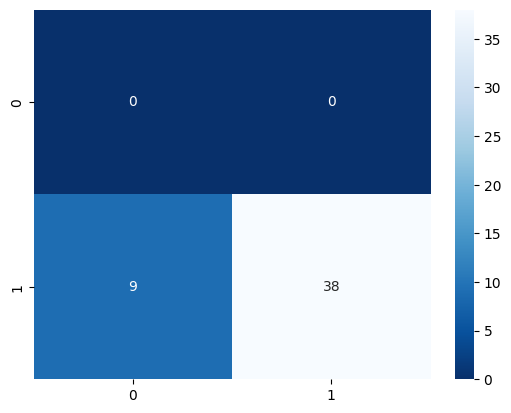

In [67]:
print(df['Overall Survival Status'].value_counts())

print('score:', modelo.score(xtest,ytest))
print('recall_score:', recall_score(prediccion, ytest, average='micro'))
print('accuracy_score', accuracy_score(prediccion, ytest))
print('f1_score', f1_score(prediccion, ytest, average='micro'))

print('classification_report',classification_report(prediccion, ytest))
cf=confusion_matrix(prediccion, ytest)
sns.heatmap(cf, annot=True, cmap='Blues_r')

In [85]:
data = {'Cirrhosis': 2, 'Diagnosis Age': 61, 'Disease Free (Months)': 10.3, 'Disease Free Status': 0, 'Mutation Count': 44, 'Neoplasm Histologic Grade':1,'Overall Survival (Months)':43.1,'Tumor Other Histologic Subtype':2}

p = pd.DataFrame(data, index=[0])
np = modelo.predict(p)

In [86]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from IPython.display import Image
import pydotplus

In [88]:
svm = DecisionTreeClassifier (max_depth=5)
modelo = svm.fit(xtrain,ytrain)
prediccion = modelo.predict(xtest)

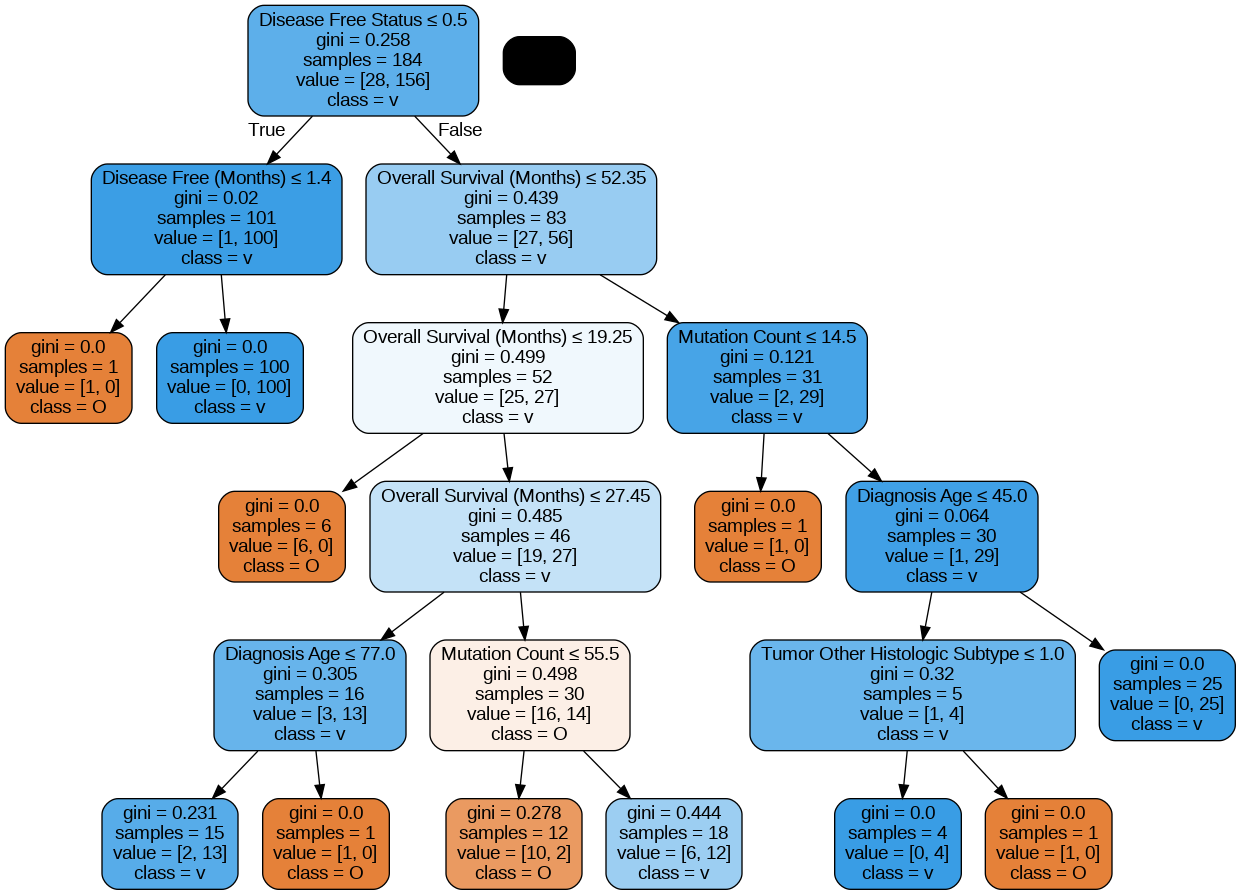

In [89]:
# Visualizar el árbol en formato Graphviz
dot_data = export_graphviz(modelo, out_file=None,
                           feature_names=features,
                           class_names= label,
                           filled=True,rounded=True,
                           special_characters=True)


graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

In [90]:
prediccion_lista = prediccion.tolist()
ytest_lista=ytest.tolist()
i=0

for p in prediccion_lista:
    print(p, '->', ytest_lista[i])
    i += 1

0 -> 0
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 0
1 -> 1
1 -> 1
1 -> 1
0 -> 0
1 -> 1
1 -> 1
0 -> 0
1 -> 1
1 -> 1
1 -> 1
1 -> 1
0 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 0
1 -> 1
1 -> 1
1 -> 1
1 -> 0
1 -> 1
1 -> 1
1 -> 1
1 -> 0
1 -> 1
1 -> 1
0 -> 0
1 -> 1
1 -> 1
1 -> 1
1 -> 0
1 -> 1
1 -> 1
1 -> 1
1 -> 1


Living      194
Deceased     37
Name: Overall Survival Status, dtype: int64
score: 0.8723404255319149
recall_score: 0.8723404255319149
accuracy_score 0.8723404255319149
f1_score 0.8723404255319149
classification_report               precision    recall  f1-score   support

           0       0.44      0.80      0.57         5
           1       0.97      0.88      0.93        42

    accuracy                           0.87        47
   macro avg       0.71      0.84      0.75        47
weighted avg       0.92      0.87      0.89        47



<Axes: >

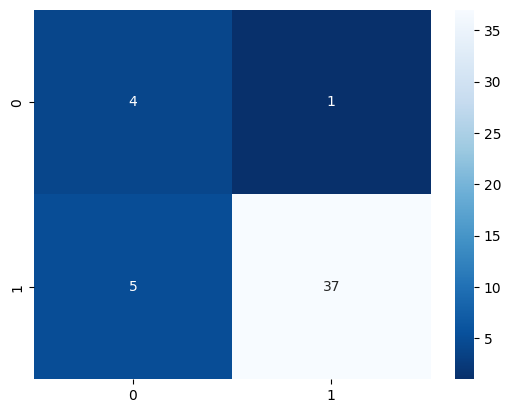

In [91]:
print(df['Overall Survival Status'].value_counts())

print('score:', modelo.score(xtest,ytest))
print('recall_score:', recall_score(prediccion, ytest, average='micro'))
print('accuracy_score', accuracy_score(prediccion, ytest))
print('f1_score', f1_score(prediccion, ytest, average='micro'))

print('classification_report',classification_report(prediccion, ytest))
cf=confusion_matrix(prediccion, ytest)
sns.heatmap(cf, annot=True, cmap='Blues_r')

In [92]:
from sklearn.ensemble import GradientBoostingClassifier

In [93]:
svm = GradientBoostingClassifier ()
modelo = svm.fit(xtrain,ytrain)
prediccion = modelo.predict(xtest)

Living      194
Deceased     37
Name: Overall Survival Status, dtype: int64
score: 0.9148936170212766
recall_score: 0.9148936170212766
accuracy_score 0.9148936170212766
f1_score 0.9148936170212766
classification_report               precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       1.00      0.90      0.95        42

    accuracy                           0.91        47
   macro avg       0.78      0.95      0.83        47
weighted avg       0.95      0.91      0.92        47



<Axes: >

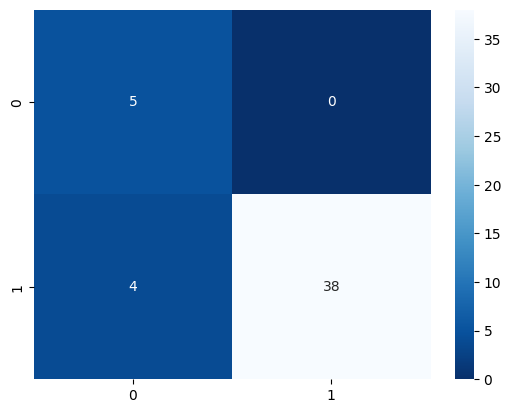

In [94]:
print(df['Overall Survival Status'].value_counts())

print('score:', modelo.score(xtest,ytest))
print('recall_score:', recall_score(prediccion, ytest, average='micro'))
print('accuracy_score', accuracy_score(prediccion, ytest))
print('f1_score', f1_score(prediccion, ytest, average='micro'))

print('classification_report',classification_report(prediccion, ytest))
cf=confusion_matrix(prediccion, ytest)
sns.heatmap(cf, annot=True, cmap='Blues_r')